# 12. Ordinary Differential Equations
---
**Content:**
- [Solving ODEs using Euler's Method](#Solving-ODEs-using-Euler's-Method)
- [Solving ODEs using Predictor-Corrector Method](#Solving-ODEs-using-Predictor-Corrector-Method)
- [Solving ODEs using Scipy's Runge-Kutta Method](#Solving-ODEs-using-Scipy's-Runge-Kutta-Method)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Solving ODEs using Euler's Method
---
$$
\begin{align*}
 \large\frac{\partial y(x)}{\partial x} = F(x, y)
 \end{align*}
$$
Approximate solution:
$$
\begin{align*}
 \text{discretised:}& & \frac{\partial y(x_i)}{\partial x_i} &= F(x_i, y_i) \\
 \text{approximated:}& & \frac{y(x_{i+1}) - y(x_i)}{\Delta x} &\approx F(x_i, y_i) \\
 & & y(x_{i+1}) &\approx F(x_i, y_i) \, \Delta x + y(x_i)
 \end{align*}
$$
Now we can step-wise "integrate" the solution starting from a **given** $y_0$.

### 1. Example: $y'(x) = y(x)$
---
$$
\begin{align*}
 \frac{\partial y(x)}{\partial x} &= y(x) = F(x,y) \quad &&\Rightarrow \quad y(x) = e^x b \\
 y(0) &= 1 \quad &&\Rightarrow \quad y(x) = e^x
\end{align*}
$$

In [ ]:
N = 2000
x = np.linspace(0, 5, N)
y = np.empty(N)
dx = x[1] - x[0]

y[0] = 1   # initial value

def F(x, y):
    return y
    
for i in range(N-1):
    y[i+1] = y[i] + dx * F(x[i], y[i])

plt.figure(1)
plt.plot(x, y, 'r', lw=3)
plt.plot(x, np.exp(x) * 1, "b--", lw=3)

plt.xlabel('$x$')
plt.ylabel('$y(x)$')

plt.show()

### 2. Example: $y'(x) = x$
---
$$
\begin{align*}
 \frac{\partial y(x)}{\partial x} &= x = F(x,y) \quad \Leftrightarrow \quad y(x) = \int x \, dx \quad = \frac{1}{2} x^2 + b \\
 y(0) &= 1
 \quad \Rightarrow \quad y(x) = \frac{1}{2} x^2 + 1
\end{align*}
$$

In [ ]:
N = 200
x = np.linspace(0, 5, N)
y = np.empty(N)
dx = x[1] - x[0]

y[0] = 1 # initial value

def F(x, y):
    return x
    
for i in range(N-1):
    y[i+1] = y[i] + dx * F(x[i], y[i])

plt.figure(1)
plt.plot(x, y, 'r', lw=3, label='numeric')
plt.plot(x, 0.5 * x**2.0 + 1, "b--", lw=3, label='analytic')

plt.xlabel('$x$')
plt.ylabel('$y(x)$')
plt.legend()

plt.show()

### 3. Example: $y'(x) = sin(x)$
---
$$
\begin{align*}
 \frac{\partial y(x)}{\partial x} &= sin(x) = F(x,y)
 &\quad \Rightarrow \quad y(x) &= -cos(x) + b \\
 y(0) &= 1
 &\quad \Rightarrow \quad y(x) &= -cos(x) + 2 
\end{align*}
$$

In [ ]:
N = 200
x = np.linspace(0, 4*np.pi, N)
y = np.empty(N)
dx = x[1] - x[0]

y[0] = 1 # initial value

def F(x, y):
    return np.sin(x)
    
for i in range(N-1):
    y[i+1] = y[i] + dx * F(x[i], y[i])

plt.figure(1)
plt.plot(x, y, 'r', lw=3, label='numeric')
plt.plot(x, -np.cos(x) + 2, "b--", lw=3, label='analytic')

plt.legend()
plt.show()

### 4. Example: Pendulum
---
<table>
    <tr>
        <td width=60%>
        <center>
        Second-oder ODE for the angle $\varphi$:   <br>   
        $$\large \frac{\partial^2 \varphi}{\partial t^2} = - \frac{g}{l} \sin{\varphi}$$
        <br>
        Coupled system of first-order ODEs:<br>
        $$ \large \pmatrix{ \dot{\varphi} \\ \dot{\omega}} = \pmatrix{ \omega \\ - \frac{g}{l} \sin{\varphi} }$$
        </center>   
        </td>
        <td>
<center>

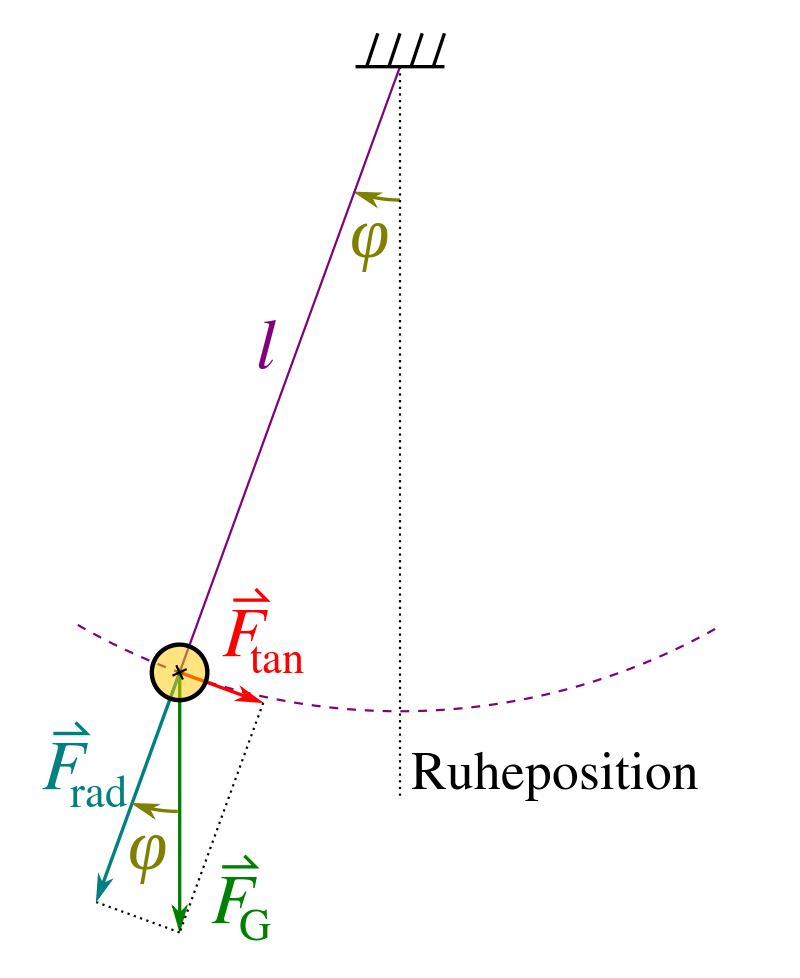
    
</center>
        </td>
    </tr>
</table>

In [ ]:
N = 100
g = 9.81    # m / s^2
l = 10.0    # m

time  = np.linspace(0, 50, N)
phi   = np.zeros(N)
omega = np.zeros(N)
dt    = time[1] - time[0]

phi[0]   = 0.1  # initial values
omega[0] = 0.0

def acceleration(phi):
    return -(g/l) * np.sin(phi)

for i in range(N-1):
    phi[i+1]   = phi[i]   + dt * omega[i]
    omega[i+1] = omega[i] + dt * acceleration(phi[i])

plt.figure(1)
plt.plot(time, phi)
plt.xlabel('$t$')
plt.ylabel('$\\varphi(t)$')
plt.show()

## Solving ODEs using Predictor-Corrector Method
---
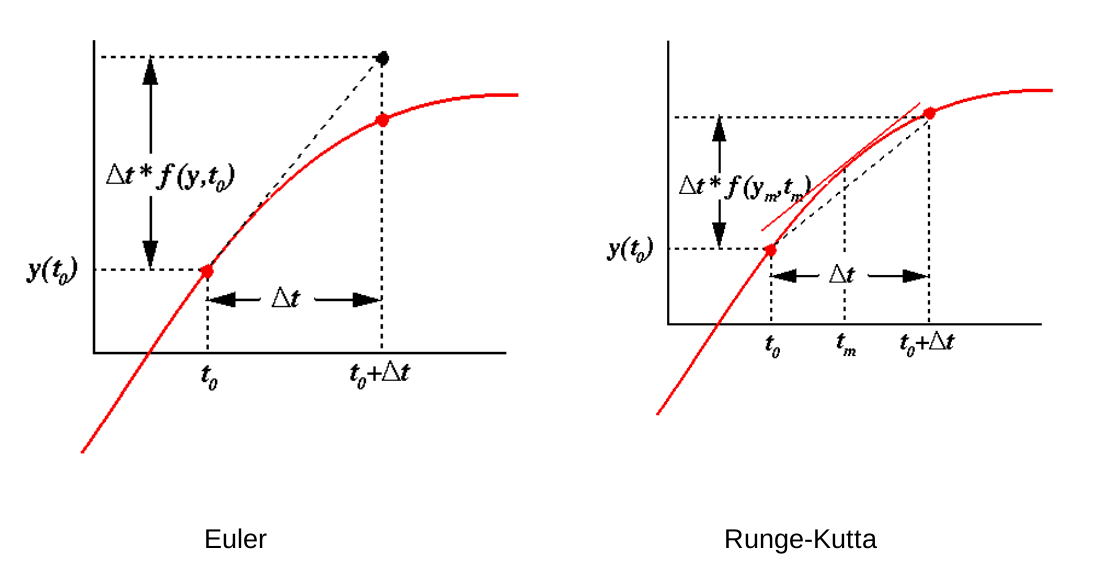

In [ ]:
N = 1000
g = 9.8
l = 10.0

time  = np.linspace(0, 50, N)
phi   = np.zeros(N)
omega = np.zeros(N)
dt    = time[1] - time[0]

phi[0]   = 0.1  # initial values
omega[0] = 0.0

def acceleration(phi):
    return -(g/l) * np.sin(phi)

for i in range(N-1):
    
    # half-step uses only values from step [n] on the right-hand side
    phi_mid   = phi[i]   + 0.5*dt * omega[i]
    omega_mid = omega[i] + 0.5*dt * acceleration(phi[i])

    # full-step uses midpoint values on the right-hand side
    phi[i+1]   = phi[i]   + dt * omega_mid
    omega[i+1] = omega[i] + dt * acceleration(phi_mid)

plt.figure(1)
plt.plot(time, phi)
plt.xlabel('$t$')
plt.ylabel('$\\varphi(t)$')
plt.show()

## Solving ODEs using Scipy's Runge-Kutta Method
---
### 1. Example: Pendulum -- done right

$$
\begin{align*}
\pmatrix{ \dot{\varphi} \\ \dot{\omega}}
& = \pmatrix{ \omega \\ - \frac{g}{l} \sin{\varphi} }
\end{align*} 
$$

needs to be reacast into the following form:

$$
\begin{align*}
\frac{\partial \vec{y}(t)}{\partial t} &= \vec{F}(t, \vec{y})\\
\vec{y}(t) &= \pmatrix{ y_0(t) \\ y_1(t) } = \pmatrix{ \varphi(t) \\ \omega(t) } \\
\vec{F}_\text{Pendulum}(t, \vec{y}) &= \pmatrix{ \omega \\ - \frac{g}{l} \sin{\varphi} } = \pmatrix{ y_1(t) \\ -\frac{g}{l} \sin{y_0(t)} }
\end{align*} 
$$

Now we will use `integrate.solve_ivp()` from Scipy:

In [ ]:
import scipy.integrate as integrate

N = 100
g = 9.8
l = 10.0

tMin = 0
tMax = 50
time = np.linspace(tMin, tMax, N)

y0 = [0, 0.1] # initial values

def FPendulum(t, y):
    F    = np.zeros(2)
    F[0] = y[1]
    F[1] = -(g/l) * np.sin(y[0])
    return F

sol = integrate.solve_ivp(FPendulum, (tMin, tMax), y0, t_eval=time)

print(sol)

In [ ]:
plt.figure(1)

plt.plot(sol.t, sol.y[0,:])
plt.plot(sol.t, sol.y[1,:])

plt.xlabel('$t$')
plt.ylabel('$\\varphi(t)$')
plt.show()

### 2. Example: $y'(x) = x$
---
$$
\begin{align*}
 \frac{\partial y(x)}{\partial x} &= x
 \quad \Leftrightarrow y(x) = \int x \, dx \quad = \frac{1}{2} x^2 + b \\
 y(0) &= 1
 \quad \Rightarrow \quad y(x) = \frac{1}{2} x^2 + 1
\end{align*}
$$

In [ ]:
N = 10
x = np.linspace(0, 5, N)
y = np.empty(N)
dx = x[1] - x[0]

y0 = [1] # initial value

def F(x, y):
    return x

sol = integrate.solve_ivp(F, (0, 5), y0, t_eval=x)

plt.figure(1)
plt.plot(x, sol.y[0, :], 'r', lw=3)
plt.plot(x, 0.5 * x**2.0 + 1, "b--", lw=3)
plt.xlabel('$x$')
plt.ylabel('$y(x)$')

plt.show()

### 3. Example: Projectile motion
---

<table>
    <tr>
        <td width=60%>
        <center>
$$\large
\begin{align*}
\pmatrix{ x(t) \\ y(t) } &= \pmatrix{ v_{0x} t \\  v_{0y} t - \frac{1}{2} g t^2}\\
\Rightarrow \pmatrix{ \dot{x}(t) \\ \dot{y}(t) } &= \pmatrix{ v_{0x} \\  v_{0y} - g t} = \vec{F}(t, \vec{y})\\
\text{with } v_{0x} &= v_0 \cos(\alpha) \\
v_{0y} &= v_0 \sin(\alpha)
\end{align*} 
$$
        </center>   
        </td>
        <td>
<center>

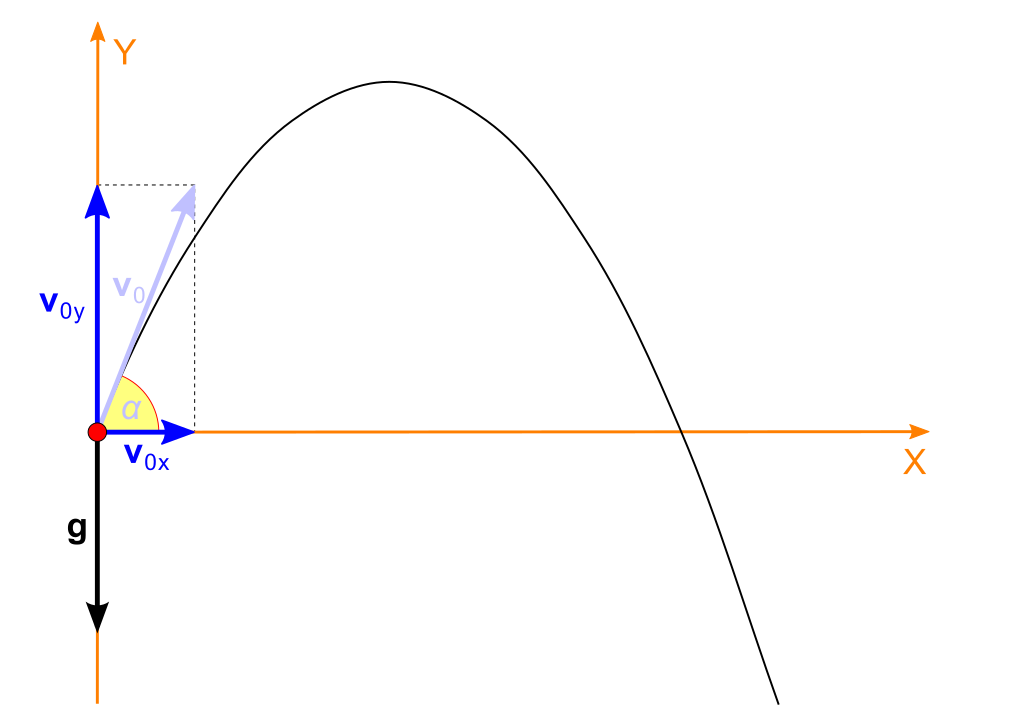
    
</center>
        </td>
    </tr>
</table>

In [ ]:
g     = 9.8
v0    = 7.0
alpha = 70.0 / 180.0 * np.pi

N    = 200
tMin = 0
tMax = 1.0
time = np.linspace(tMin, tMax, N)

y0 = [0, 0] # initial values

def FProjectile(t, y):
    F    = np.zeros(2)
    F[0] =  v0 * np.cos(alpha)
    F[1] =  v0 * np.sin(alpha) - g * t
    
    return F

sol = integrate.solve_ivp(FProjectile, (tMin, tMax), y0, t_eval=time)

plt.figure(1)
plt.plot(sol.y[0, :], sol.y[1, :])
#plt.ylim([0, 0.21])
#plt.xlim([0, 0.15])
plt.show()

### 3. Example: Multidimensional
---
$$
\begin{align*}
\frac{\partial \vec{y}(t)}{\partial t} = \vec{F}(t, \vec{y}) = \pmatrix{ y_1 \\ y_2 \\ y_0^2}
\end{align*} 
$$

In [ ]:
def F(t, y):
    myF    = np.zeros(3)
    myF[0] = y[1]
    myF[1] = y[2]
    myF[2] = y[0]**2.0
    return myF

N    = 200
tMin = 0
tMax = 3.0
time = np.linspace(tMin, tMax, N)

y0 = [-1, 0, 0] # initial values

sol = integrate.solve_ivp(F, (tMin, tMax), y0, t_eval=time)

plt.figure(1)
plt.plot(sol.t, sol.y[0,:], label='$y_0(t)$')
plt.plot(sol.t, sol.y[1,:], label='$y_1(t)$')
plt.plot(sol.t, sol.y[2,:], label='$y_2(t)$')
plt.xlabel('$t$')
plt.legend()
plt.show()

### 4. Example: Circle / Spiral
---
$$
\pmatrix{ x \\ y } = \pmatrix{ \cos{\varphi} \\ \sin{\varphi} }
\Leftrightarrow
\pmatrix{ \dot{x} \\ \dot{y} } = \pmatrix{ y \\ -x } 
$$

In [ ]:
def F(phi, y):
    myF    = np.zeros(2)
    myF[0] =  y[1] #- 0.1 * y[0]
    myF[1] = -y[0] #- 0.1 * y[1]
    return myF

N      = 200
phiMin = 0.01
phiMax = 8.0 * np.pi
phi    = np.linspace(phiMin, phiMax, N)

y0 = [1, 1] # initial values

sol = integrate.solve_ivp(F, (phiMin, phiMax), y0, t_eval=phi)

plt.figure(1)
plt.plot(sol.y[0,:], sol.y[1,:])
plt.axis('equal')
plt.show()

### 5. Example:  Lotka–Volterra equations / predator–prey equations
---
$$
\pmatrix{ \dot{r} \\ \dot{f} } = \pmatrix{ \alpha r - \beta r f \\ \delta r f - \gamma f} \matrix{ \text{rabits} \\ \text{foxes} }
$$

In [ ]:
a = 0.5
b = 0.1
g = 0.7
d = 0.1

N    = 200
tMin = 0
tMax = 20.0
time = np.linspace(tMin, tMax, N)

y0 = [10, 2] # initial values

def FLVE(t, y):
    
    r, f = y
    
    rDot = a * r     - b * r * f
    fDot = d * r * f - g * f 
    
    return rDot, fDot

sol = integrate.solve_ivp(FLVE, (tMin, tMax), y0, t_eval=time)

plt.figure(1)
plt.plot(time, sol.y[0, :], label="rabits")
plt.plot(time, sol.y[1, :], label="foxes")
plt.legend()
plt.xlabel('time')
plt.show()